In [14]:
using ComputationalHeatTransfer

In [15]:
# using Plots
using LaTeXStrings

In [16]:
using Revise
using LinearAlgebra
using DifferentialEquations
using Plots
pyplot()

Plots.PyPlotBackend()

In [17]:
cd(dirname(pwd()))
cd("src") 

includet("OneDOHP.jl")
using ..OneDOHP

### Physical parameters

In [97]:
ρ = 2702;
c = 9.03e02;
k = 2.37e02;
d = 1e-3;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(2702.0, 903.0, 237.0, 9.713488962279695e-5, 0.001)

### Geometry parameters

In [98]:
Lx = 0.1524
Ly = 0.0648;
inch = 2.54e-2;

In [99]:
xlim = (-Lx/2,Lx/2)
ylim = (-Ly/2,Ly/2)
# Δx, Δt = setstepsizes(params.α,gridPe=0.1,fourier=200.0)
Δx, Δt = setstepsizes(params.α,gridPe=5.0,fourier=1000.0)
Δx, Δt = setstepsizes(params.α,gridPe=5.0,fourier=1000000.0)

(0.00048567444811398473, 0.23587966955082365)

### Set up the evaporator and condenser

In [100]:
eb = Rectangle(inch,inch,1.5*Δx)
Te = RigidTransform((0.0,-0.0),0.0)
Te(eb)
cb1 = Rectangle(0.5,0.5,1.5*Δx)
Tc = RigidTransform((0.5+0.5Lx-inch,-0.0),0.0)
Tc(cb1)

cb2 = Rectangle(0.5,0.5,1.5*Δx)
Tc = RigidTransform((0.5-(0.5Lx-inch),-0.0),0.0)
Tc(cb2)

qe = 15500.0
hc = 2000.0
Tc = -30.0

eparams = PrescribedHeatFluxRegion(qe,eb);
cparams = [PrescribedHeatModelRegion(hc,Tc,cb1);PrescribedHeatModelRegion(-hc,Tc,cb2)];

### Set up the OHP

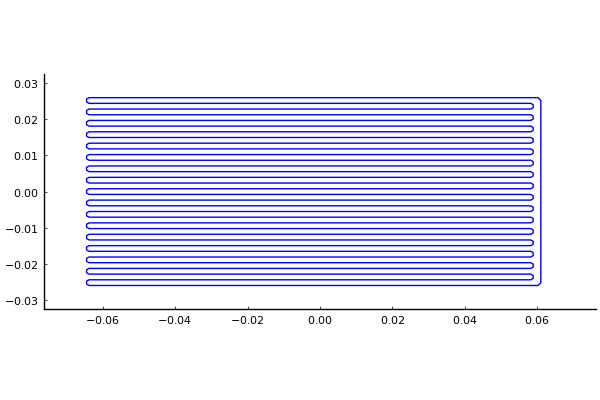

In [101]:
ds = 1.5Δx
nturn = 16
#pitch = 0.125
length_ohp = Ly*0.8
height = Lx*0.8
gap = 2*d
pitch = length_ohp/(2*nturn+1)
x0, y0 = height/2, length_ohp/2
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,3pi/2)
ohp = BasicBody(x,y)

plot(ohp,fillalpha=0,linecolor=:blue,xlims=xlim,ylims=ylim)


In [102]:
ohpgeom = ComputationalHeatTransfer.LineSourceParams(ohp)
qtmp = zeros(numpts(ohp));

### Create the system

In [166]:
sys = HeatConduction(params,Δx,xlim,ylim,Δt,qflux=eparams,qmodel=cparams,qline=ohpgeom)
# sys = HeatConduction(params,Δx,xlim,ylim,Δt,qflux=eparams,qmodel=cparams)
#sys = HeatConduction(params,Δx,xlim,ylim,Δt,qline=ohpgeom)

Unbounded Heat conduction system on a grid of size 320 x 140 and 0 static immersed points


#### Initialize state, and create the integrator

In [167]:
u0 = newstate(sys)
# tspan = (0.0,1.0)
tspan = (0.0,0.1)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Primal nodes in a (nx = 320, ny = 140) cell grid of type Float64 data
  Number of Primal nodes: (nx = 319, ny = 139), Float64[])

### Set up values for the OHP heat flux per unit length and advance the solution

In [168]:
fill!(qtmp,-0.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 320 x 140 and 0 static immersed points


In [189]:
@time step!(integrator,5.0)
maximum(integrator.u[:])

  6.268630 seconds (172.96 k allocations: 1.102 GiB, 6.27% gc time)


84.96809499134923

In [190]:
integrator.t

30.20000000000016

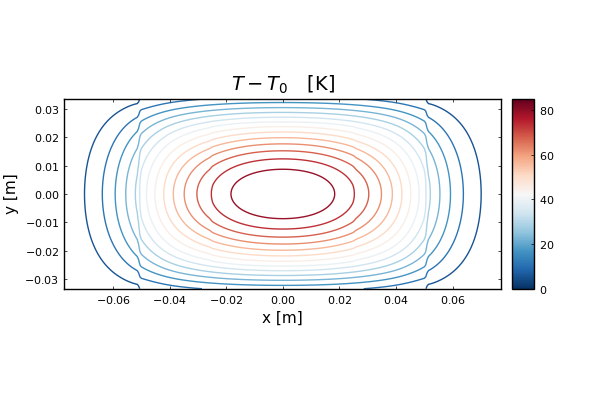

In [149]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),line_z=0,xlabel="x [m]",ylabel="y [m]",title=L"T - T_0 \quad [\mathrm{K}]")
# plot!(ohp,fillalpha=0,line_z=qtmp)

In [165]:
maximum(integrator.u[:])

84.83744345401097

### Plot the temperature along the OHP channel

In [ ]:
plot(ohp,fillalpha=0,line_z=temperature_linesource(integrator))

In [ ]:
plot(sys.qline[1].arccoord,temperature_linesource(integrator),xlabel=L"\xi",ylabel=L"T - T_0")

# OHP inner part

In [ ]:
T0 = 273.15
nondi_Q_to_Q = 8.52e01
t_to_nondi_t = 3.42e-01
function di_T_to_nondi_T(di_T;T0=273.15) 
    
    (di_T+T0)/T0
    
end

In [ ]:
    ω = sqrt(1.68e003);
    ℘L = 6.2e004;
    k = 115e-003

    θinitial=1.0
    θc = 1.0; # useless

    Hwc = 0.0; #not useful later on. H between wall and condenser, 
    Hₗ   =  1600.0; # liquid wall heat transfer coeffcient
#     Hₗ   =  2.57e004; # liquid wall heat transfer coeffcient
    Hδ  = 7.34e002;


In [ ]:
    
    d = 6.56e-3 # dimensionless diameter
    L = 35.0  # total length of the pipe when streched to a 1D pipe
    L2D = 1.0 # the actual length of the bended pipe in the real world
    angle = 0*pi/2 # inclination angle 
    closedornot = true

In [ ]:
    nucleatenum = 10
    Xstations = sort(rand(nucleatenum).*L);
#     boilingΔt = 0.05

In [ ]:
tube = Tube(d,L,L2D,angle,closedornot);

In [ ]:
Xe = map(tuple, [1.0], [3.0])
We = [0.0]
evap = Evaporator(Xe,We);

In [ ]:
Xc = map(tuple, [0.0,3.0], [1.0,4.0])
cond = Condenser(θc,Xc,Hwc);

In [ ]:
numofX=16
Xps = sort(rand(2*numofX).*L);
Xp1s = Xps[1:2:end];
Xp2s = Xps[2:2:end];

dXdt0 = map(tuple,0*Xp1s,0*Xp2s)
X0 = map(tuple,Xp1s,Xp2s)


In [ ]:
N=numpts(ohp)
# X0 = [(L/4, L*3/4)]
# dXdt0 = [(0.0,0.0)]
ρ = 214.6
Xarrays,θarrays = constructXarrays(X0,N,θinitial,L)
liquids=Liquid(Hₗ,ρ,ω,℘L,X0,dXdt0,Xarrays,θarrays);

In [ ]:
# P = [1.0,1.0,1.0,1.0,1.0]; # closed end

γ = 1.4;
Hδ = 7.34e2
P = 0*Xp1s .+ 1.0;
δ = 0*Xp1s .+ 2.86e-02;
vapors=Vapor(γ,Hδ,P,δ);

In [ ]:
α = 0 # nondimensional thermal diffusivity = (αₐ d^2) / (νₗ height^2)
Xwallarray,θwallarray = constructXarrays(L,N,θinitial)

wall = Wall(α,Δt,Xstations,Xwallarray,θwallarray);

In [ ]:
walltoliquid, liquidtowall = constructmapping(Xarrays,Xwallarray,closedornot,L)
mapping = Mapping(walltoliquid,liquidtowall);

In [ ]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors,wall,mapping);

## construct state vector U

In [ ]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L,sys0.tube.closedornot)
M = P.^(1/γ).* Lvaporplug


u=[XMδtovec(X0,dXdt0,M,δ); wallθtovec(sys0.wall.θarray); liquidθtovec(sys0.liquid.θarrays)];

In [ ]:
cb_boiling =  DiscreteCallback(boiling_condition,boiling_affect!)
cb_merging =  DiscreteCallback(merging_condition,merging_affect!)

cbst = CallbackSet(cb_boiling,cb_merging)

## solve OHP

In [ ]:
tstep=1e-4

p = sys0
# tspan = (0.0, 0.01);
prob = ODEProblem(ODE_innertube, u, tspan, p)

integrator_tube = init(prob, RK4(), dt=tstep, callback=cbst);


@time solve!(integrator_tube);



In [ ]:
sol = integrator_tube.sol
sysfinal = getcurrentsys.(sol.u,[sys0]);

## combine inner tube and plate together

In [ ]:
u0 = newstate(sys)
integrator = init(u0,tspan,sys)

In [ ]:
integrator_tube = init(prob, RK4(),save_everystep=false, callback=cbst);

In [ ]:
# for t in tspan[1]:tstep:tspan[2]
for t in tspan[1]:tstep:tspan[1]
    @time currentsys = getcurrentsys(integrator_tube.u,sys0)

    currentsys.wall.θarray = di_T_to_nondi_T(temperature_linesource(integrator))

    nondi_qtmp = sys_to_heatflux(currentsys)
    qtmp = nondi_Q_to_Q*nondi_qtmp
    set_linesource_strength!(sys,qtmp)

    @time step!(integrator,tstep, true)




    current_u = deepcopy(integrator_tube.u)
    index = findfirst(x -> (abs(x+1e10) <= 10^(-1)),current_u)
    current_u[index+1:index+length(currentsys.wall.θarray)] = currentsys.wall.θarray
    set_u!(integrator_tube, current_u)
    @time step!(integrator_tube, tstep*t_to_nondi_t, true)

end

In [ ]:
integrator.t

In [ ]:
sysfinal = [getcurrentsys(integrator_tube.u,sys0)];

In [ ]:
# plot(ohp,fillalpha=0,line_z=temperature_linesource(integrator))

In [ ]:
plot(sys.qline[1].arccoord,qtmp)

In [ ]:
plot(sys.qline[1].arccoord,temperature_linesource(integrator),xlabel=L"\xi",ylabel=L"T - T_0")

In [ ]:
qtmp

In [ ]:
plot(ohp,fillalpha=0,line_z=qtmp)

In [ ]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),line_z=0,clim=(-1.5,1.5))
plot!(ohp,fillalpha=0,line_z=0 .* qtmp)

In [ ]:
integrator_tube.u

In [ ]:
sysfinal = [getcurrentsys(integrator_tube.u,sys0)];
sysfinal[1].vapor

In [ ]:
sysfinal[1].vapor

In [ ]:
plot(sysfinal[1].liquid.θarrays[4] .* T0)

In [ ]:
sysfinal[end].tube.L

In [ ]:
# closed loop plot
@gif for i=1:1:length(sysfinal)

    Xpvapor = getXpvapor(sysfinal[i].liquid.Xp,sysfinal[i].tube.L,sysfinal[i].tube.closedornot)
    θvapor  = (sysfinal[i].vapor.P).^((γ-1)/γ)
    Xp = sysfinal[i].liquid.Xp
    
    p = plot([sysfinal[i].wall.Xarray],[sysfinal[i].wall.θarray], linewidth=3, color = [:black], labels = "θwall", xlabel="X", ylabel="θ", title=("dimensionless temperatures"),xlim=(0,sysfinal[i].tube.L))
    
    
    j=1
    while j <= length(Xp)
        if Xp[j][end] >= Xp[j][1]
            plot!(p, [sysfinal[i].liquid.Xarrays[j]],[sysfinal[i].liquid.θarrays[j]], linewidth=2, labels = string("θliquid ",j))
            else 
            # find the index at the end
            index = findfirst(x->x <= sysfinal[i].liquid.Xarrays[j][end], sysfinal[i].liquid.Xarrays[j])
            
            plot!(p, [sysfinal[i].liquid.Xarrays[j][1:index-1]],[sysfinal[i].liquid.θarrays[j][1:index-1]], linewidth=2, labels = string("θliquid ",j))
            plot!(p, [sysfinal[i].liquid.Xarrays[j][index:end]],[sysfinal[i].liquid.θarrays[j][index:end]], linewidth=2, labels = string("θliquid ",j))

        end
        
        j += 1
    end

        j=1
    while j <= length(Xpvapor)
        if Xpvapor[j][end] >= Xpvapor[j][1]
            plot!(p,[Xpvapor[j][1],Xpvapor[j][end]],[θvapor[j]], labels = string("θvapor ",j))
            else
            
            plot!(p,[0.0,Xpvapor[j][end]],[θvapor[j]], labels = string("θvapor ",j))
            plot!(p,[Xpvapor[j][1],L],[θvapor[j]], labels = string("θvapor ",j))

        end
        
        j += 1
    end
    
#     j = 1
#     plot!(p,[0.0,Xpvapor[j][end]],[θvapor[j]], labels = string("θvapor ",j))
#     plot!(p,[Xpvapor[j][1],L],[θvapor[j]], labels = string("θvapor ",j))
    
#     j = 2
#     while j  <= length(θvapor) 
    
#         plot!(p,[Xpvapor[j][1],Xpvapor[j][end]],[θvapor[j]], labels = string("θvapor ",j))
        
#         j += 1
#     end

#     vline!( p, [collect(0:2:4)], color=[:blue,:red], width=196, alpha=[0.3,0.3,0.3],labels = "")
    
    end 